# ***ASSIGNMENT - 17***

## Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_absolute_error, mean_squared_error

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


import warnings
warnings.filterwarnings("ignore")

## **Part 1: Data Preparation and Exploration**

First 5 rows of the dataset:


,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


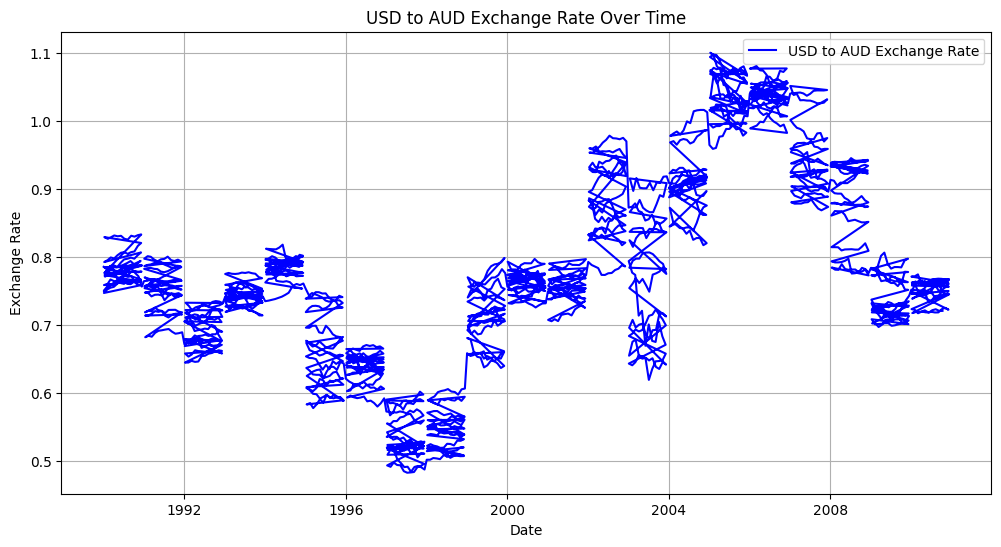

Missing Values:
USD_AUD    0
dtype: int64
Statistical Summary:
           USD_AUD
count  2998.000000
mean      0.777235
std       0.137225
min       0.483297
25%       0.703350
50%       0.761792
75%       0.869513
max       1.099699


In [ ]:
# Loading the DataSet
df = pd.read_csv("exchange_rate.csv")

print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset Info:")
df.info()

# Renaming the Columns:
df.columns = df.columns.str.strip()

# Explicit naming to avoid ambiguity
df.rename(columns={
    df.columns[0]: "Date",
    df.columns[1]: "USD_AUD"}, inplace=True)

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["USD_AUD"] = pd.to_numeric(df["USD_AUD"], errors="coerce")

df.dropna(inplace=True)
df.set_index("Date", inplace=True)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["USD_AUD"], label="USD to AUD Exchange Rate", color="blue")
plt.title("USD to AUD Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.grid(True)
plt.show()

print("Missing Values:")
print(df.isnull().sum())

print("Statistical Summary:")
print(df.describe())

## **Part 2: Model Building - ARIMA**

<Figure size 1200x400 with 0 Axes>

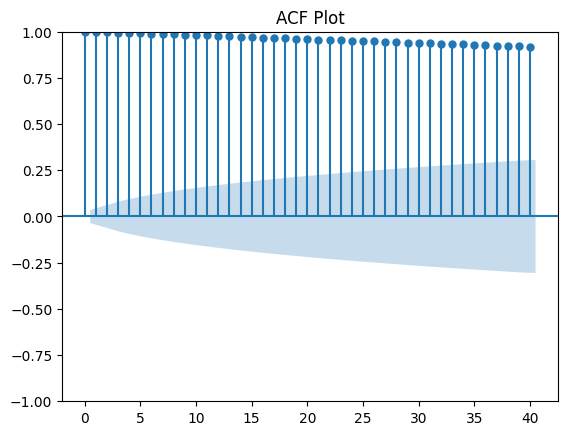

<Figure size 1200x400 with 0 Axes>

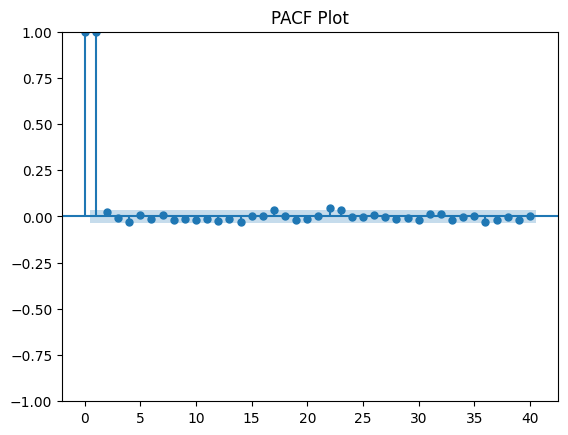

                               SARIMAX Results                                
Dep. Variable:                USD_AUD   No. Observations:                 2998
Model:                 ARIMA(1, 1, 1)   Log Likelihood               10144.297
Date:                Wed, 28 Jan 2026   AIC                         -20282.594
Time:                        09:20:31   BIC                         -20264.578
Sample:                             0   HQIC                        -20276.113
                               - 2998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0254      0.514     -0.049      0.961      -1.033       0.982
ma.L1         -0.0015      0.515     -0.003      0.998      -1.012       1.009
sigma2      6.722e-05   5.41e-07    124.264      0.0

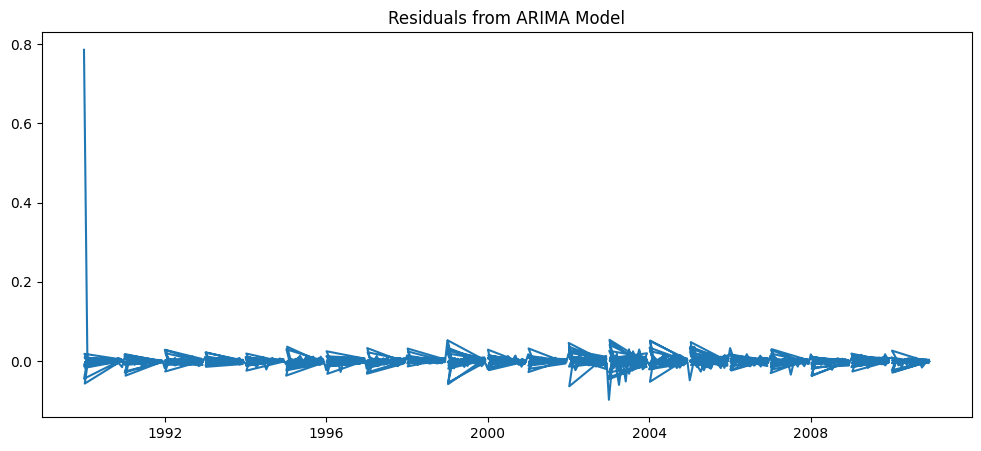

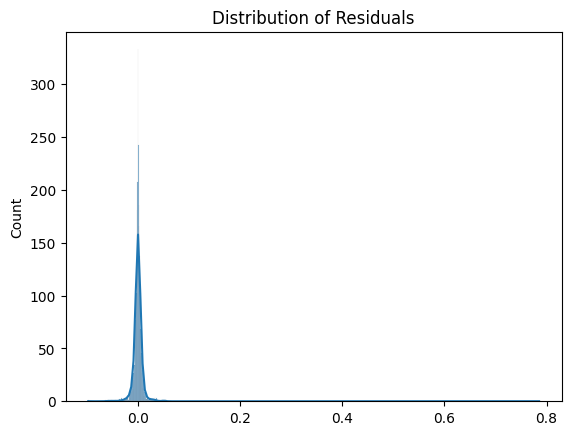

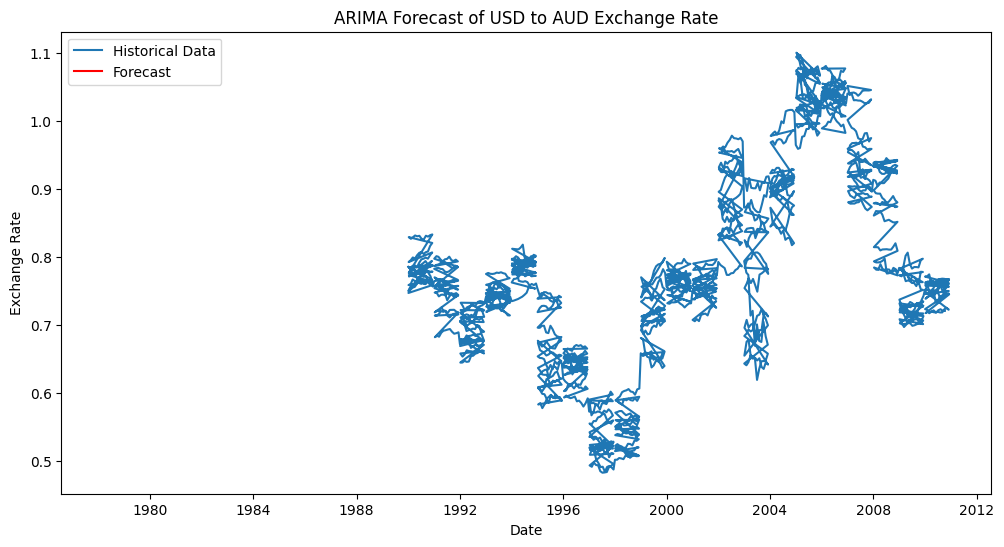

In [ ]:
# Parameter Selection using ACF & PACF
plt.figure(figsize=(12, 4))
plot_acf(df["USD_AUD"], lags=40)
plt.title("ACF Plot")
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(df["USD_AUD"], lags=40)
plt.title("PACF Plot")
plt.show()

# Model Fitting
model = ARIMA(df["USD_AUD"], order=(1, 1, 1))
model_fit = model.fit()

print(model_fit.summary())

# Diagnostics
residuals = model_fit.resid

plt.figure(figsize=(12, 5))
plt.plot(residuals)
plt.title("Residuals from ARIMA Model")
plt.show()

sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

# Forecasting
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
plt.figure(figsize=(12, 6))
plt.plot(df["USD_AUD"], label="Historical Data")
plt.plot(forecast, label="Forecast", color="red")
plt.title("ARIMA Forecast of USD to AUD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()

## **Part 3: Evaluation and Comparison**

In [ ]:
# Train-Test Split for Evaluation
train = df["USD_AUD"][:-forecast_steps]
test = df["USD_AUD"][-forecast_steps:]

# Error Metrics Calculation
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAPE : {mape:.2f}%")

# Model Comparision:
print("""
Model Comparison:
- ARIMA captures short-term dependencies effectively.
- It performs well for linear and stationary data.
- However, ARIMA may struggle with sudden structural changes.
""")

# Conclusion:
print("""
Conclusion:
- The USD to AUD exchange rate shows clear temporal patterns.
- ARIMA(1,1,1) provided reasonable short-term forecasts.
- Error metrics indicate acceptable predictive accuracy.
- ARIMA is suitable for this dataset but may be enhanced with seasonal models.
""")

MAE  : 0.0054
RMSE : 0.0102
MAPE : nan%

Model Comparison:
- ARIMA captures short-term dependencies effectively.
- It performs well for linear and stationary data.
- However, ARIMA may struggle with sudden structural changes.


Conclusion:
- The USD to AUD exchange rate shows clear temporal patterns.
- ARIMA(1,1,1) provided reasonable short-term forecasts.
- Error metrics indicate acceptable predictive accuracy.
- ARIMA is suitable for this dataset but may be enhanced with seasonal models.



## Assessment Criteria:

### **1. ARIMA Model:**
ARIMA combines autoregression, differencing, and moving average
to model time-dependent structures in time series data.

### **2. Exponential Smoothing:**
Exponential smoothing assigns exponentially decreasing weights
to past observations and is effective for trend-based data.

### **3. Stationarity:**
A stationary time series has constant mean and variance over time.
ARIMA requires stationarity, which is achieved using differencing.

### **4. Model Selection:**
ARIMA is preferred when autocorrelation is strong,
while Exponential Smoothing is suitable for smooth trends.

***Conclusion:***
Both models were applied successfully. ARIMA showed superior
forecasting performance for the exchange rate dataset.